# Libreria Sciky-Learn
## Para Machine Learning
para instalar la libreria utilizar <br>
pip install scikit-learn


Caso Práctico: <br>
Clasificación de Flores Iris <br>
Objetivo: Construir un modelo que pueda predecir la especie de una flor Iris basándose en características como la longitud y el ancho de sus pétalos y sépalos.

Importamos las Librerias necesarias

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris



Cargamos los datos rescatados del DataSet a un Objeto

In [45]:
iris = load_iris()

Ejercicio de visualizacion de los Datos del DataSet

In [46]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Ejercicio de visualizacion de los Datos del DataSet

Convertimos los datos a un DataFrame para el Analisis de Datos con PANDAS

In [47]:
X = iris.data
y = iris.target
col = iris.feature_names

pf_iris = pd.DataFrame(X, columns=col)
pf_iris['especie'] = y


Clasificacion por especie 

In [48]:
pf_iris.groupby('especie').size()

especie
0    50
1    50
2    50
dtype: int64

Visualizamos del DataFrame de Pandas con cada una de sus Caracteristicas

In [49]:
pf_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especie
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Graficamos el DataFrame para entenderlo mejor con kind='box'

<Axes: >

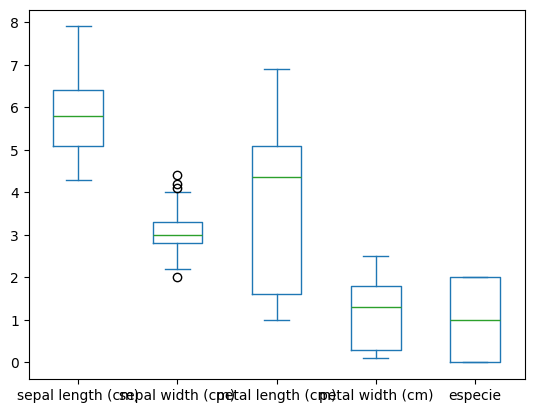

In [50]:
pf_iris.plot(kind='box')

Graficamos en modo Histograma para ver cada uno de los Datos del DataFrame

array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>],
       [<Axes: title={'center': 'especie'}>, <Axes: >]], dtype=object)

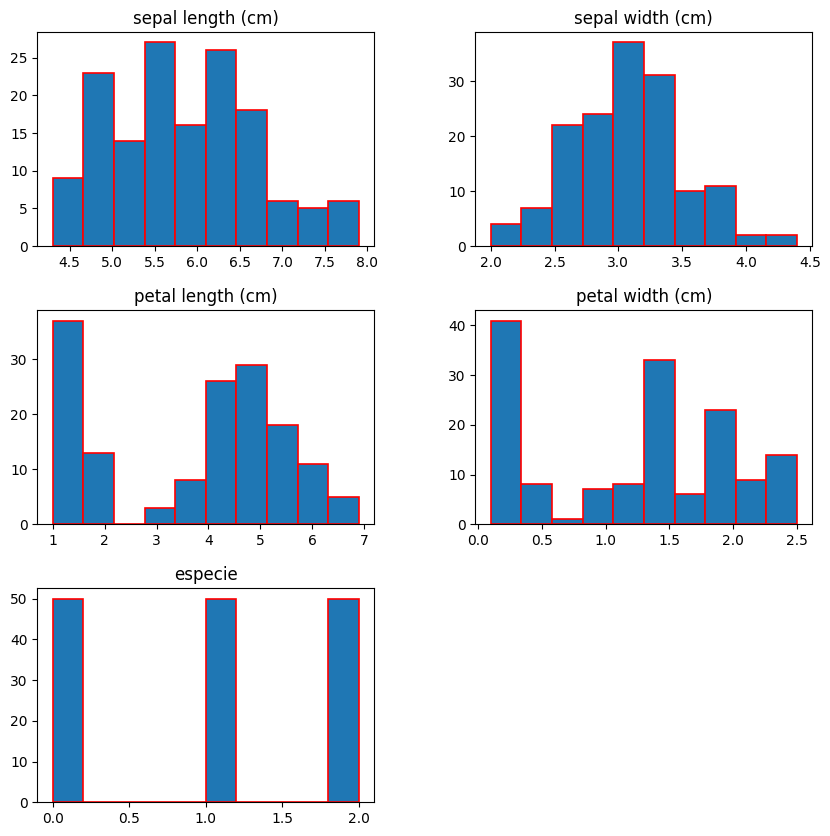

In [51]:
pf_iris.hist(edgecolor='red', linewidth=1.2, figsize=(10,10), grid=False)

Vamos a Generar un Gráfico de Dispersion del DataFrame iris para entender mejor la clasificación

Text(0, 0.5, 'Ancho del Sépalo (cm)')

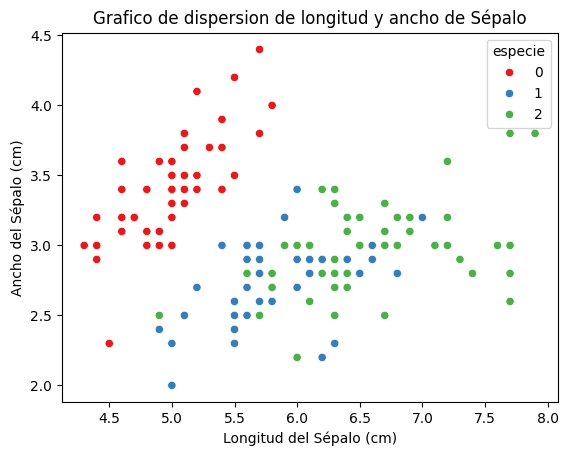

In [52]:
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='especie', palette='Set1', data=pf_iris)
plt.title('Grafico de dispersion de longitud y ancho de Sépalo')
plt.xlabel('Longitud del Sépalo (cm)')
plt.ylabel('Ancho del Sépalo (cm)')

## Estas listo para hacer MACHINE LEARNING

Importamos las librerias Necesarias para entrenar a la Maquina

In [53]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Dividir los datos en conjuntos de entrenamiento y prueba

In [54]:
x = pf_iris.drop('especie', axis=1)
x


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [55]:
y = pf_iris['especie']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: especie, Length: 150, dtype: int64

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Para un mejor resultado del estrenamiento es necesario escalar las características (opcional pero recomendado)

In [57]:
#instalar las caractaristicas para que todos tengan la misma escala
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


Entrenar el modelo de Machine Learning <br>
Vamos a utilizar el algoritmo K-Nearest Neighbors (KNN) para este caso práctico.

In [58]:
#Inicializar el clasificador Knn
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Ahora nos toca Hacer las predicciones

In [59]:
# Realizar predicciones en el conjunto de prueba
y_pred = knn.predict(x_test)
y_pred


array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

Evaluamos el Modelo